# Naive Bayes Classifier 

In [31]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [32]:
#See the available datasets in seaborn 
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

## Load penguins data set

In [33]:
penguins = sns.load_dataset('penguins').dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [34]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [35]:
penguins['island'].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

In [36]:
penguins['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

## Exploratory Analysis 

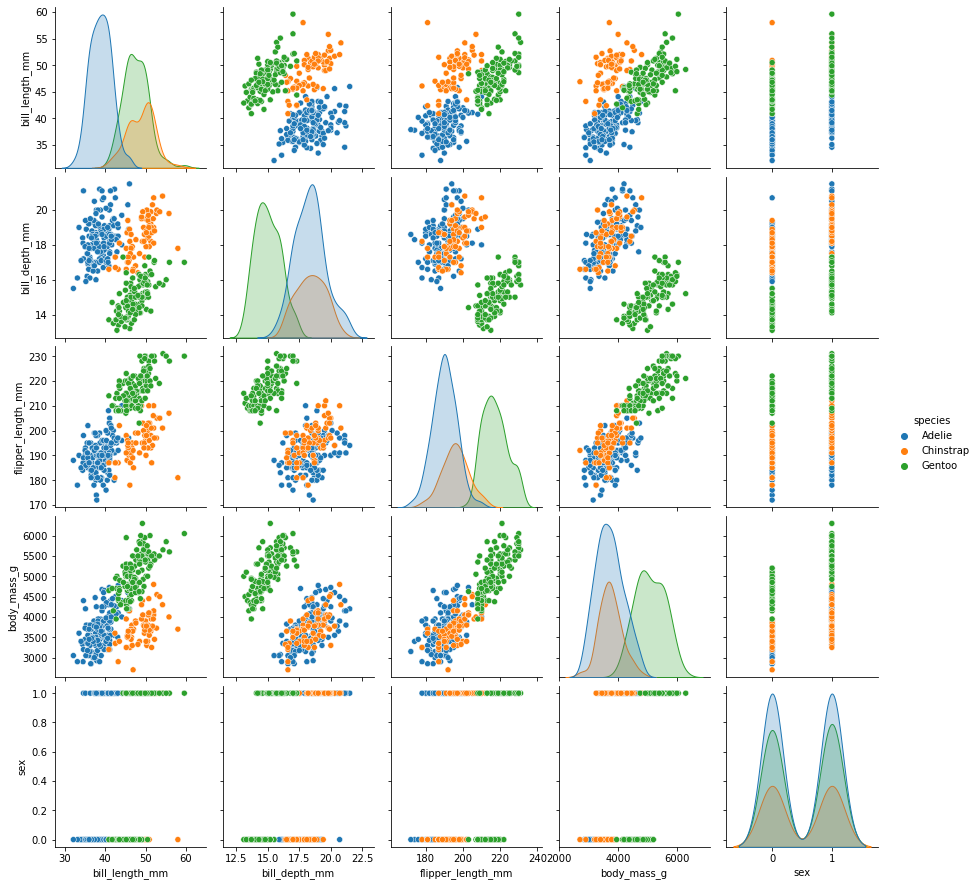

In [68]:
sns.pairplot(penguins,hue='species')

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

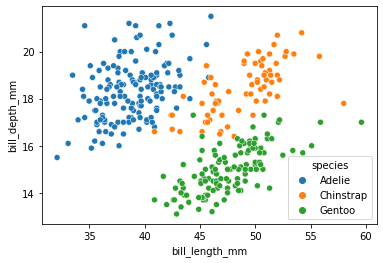

In [37]:
sns.scatterplot(x='bill_length_mm',y='bill_depth_mm',data=penguins, hue='species')

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

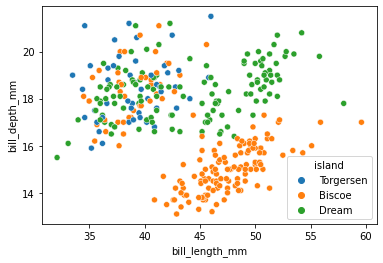

In [38]:
sns.scatterplot(x='bill_length_mm',y='bill_depth_mm',data=penguins, hue='island')

<AxesSubplot:xlabel='species', ylabel='Count'>

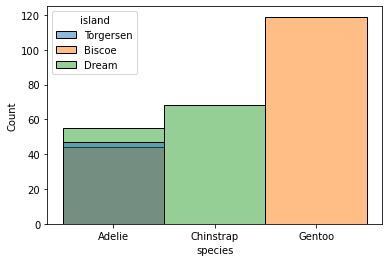

In [39]:
sns.histplot(x='species',data=penguins,hue='island')

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

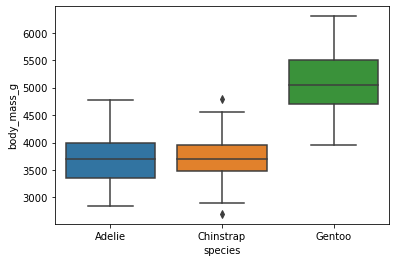

In [40]:
sns.boxplot(y='body_mass_g',x='species',data=penguins)

<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

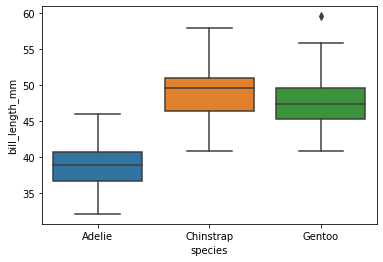

In [41]:
sns.boxplot(y='bill_length_mm',x='species',data=penguins)

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

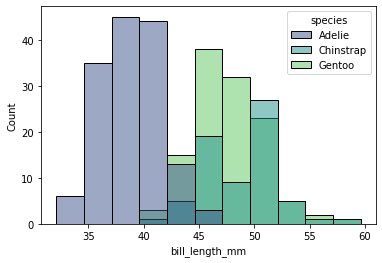

In [42]:
sns.histplot(x='bill_length_mm',data=penguins,hue='species',palette='viridis')

<AxesSubplot:xlabel='body_mass_g', ylabel='Count'>

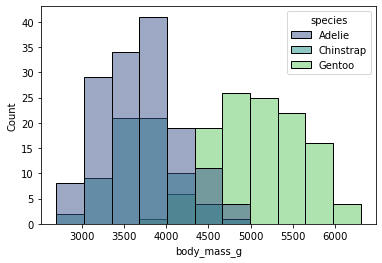

In [43]:
sns.histplot(x='body_mass_g',data=penguins,hue='species',palette='viridis')

## Model development 

In [66]:
#penguins['species'] = penguins['species'].replace(to_replace=['Adelie','Gentoo','Chinstrap'],
#                                                  value=[0,1,2])
penguins.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0


In [45]:
penguins['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [46]:
penguins['sex'] = pd.get_dummies(penguins['sex'],drop_first=True)
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,0


In [47]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

## Model development 
Each algorithm of NB expects different types of data.

* GaussianNB → When you have continuous features.
* CategoricalNB → When you have categorical data.
* MultinomialNB → Applied to text data.

In [48]:
X= penguins[['bill_length_mm', 'bill_depth_mm','flipper_length_mm','body_mass_g']]
y = penguins['species']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
gnb = GaussianNB()

In [53]:
gnb.fit(X_train,y_train)

GaussianNB()

In [54]:
predict = gnb.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [56]:
print(confusion_matrix(y_test,predict))

[[52  0  0]
 [ 2 18  0]
 [ 0  0 38]]


In [57]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        52
   Chinstrap       1.00      0.90      0.95        20
      Gentoo       1.00      1.00      1.00        38

    accuracy                           0.98       110
   macro avg       0.99      0.97      0.98       110
weighted avg       0.98      0.98      0.98       110



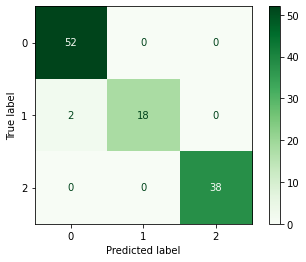

In [58]:
cm = confusion_matrix(y_test,predict)
ConfusionMatrixDisplay(cm).plot(cmap='Greens')
plt.show()

## Exercise:
**Classify penguins in which islands they live using other features*** 

Ref: https://www.datacamp.com/tutorial/naive-bayes-scikit-learn

How to balance an imbalanced dataset: https://www.datacamp.com/workspace/templates/template-python-resample-a-dataset

## Appendix 
**Understanding PDF (Probability Density Button) of normal distribution**

### pdf of normal distribution
$$p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }}e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }$$

In [59]:
import numpy as np

In [60]:
mu = 5092.4 
std = 501.1

In [61]:
def f_x(x):
    return (1/np.sqrt(2*np.pi*std**2))*np.exp(-((x-mu)**2)/(2*std**2))

In [62]:
f_x(5092)

0.0007961328144078741

In [63]:
f_x(5000)

0.0007827127010228065

In [64]:
f_x(500)

4.598981458907361e-22

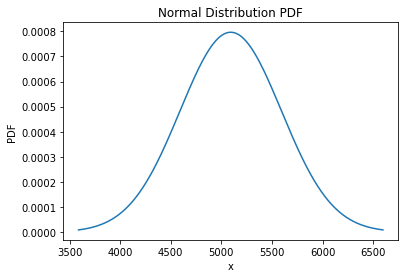

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters
mu = 5092  # Mean body mass
sigma =  501  # Standard deviation of body mass

# Create x values
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 500)

# Calculate PDF
pdf = norm.pdf(x, mu, sigma)

# Plot PDF
plt.plot(x, pdf)
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Normal Distribution PDF')
plt.show()